<a href="https://colab.research.google.com/github/priyanshu2005chaubey/FUTURE_DS_03/blob/main/FUTURE_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

print("Upload both datasets together:")
uploaded = files.upload()

Upload both datasets together:


Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey.csv
Saving student_feedback.csv to student_feedback.csv


In [ ]:
import pandas as pd

# Print uploaded filenames
for filename in uploaded.keys():
    print(filename)

# Load datasets (replace names as they appear in the upload)
ratings_df = pd.read_csv('student_feedback.csv', encoding='latin1')
comments_df = pd.read_csv('Student_Satisfaction_Survey.csv', encoding='latin1')

# Confirm by printing column names
print("Ratings dataset columns:")
print(ratings_df.columns)

print("\nComments dataset columns:")
print(comments_df.columns)

Student_Satisfaction_Survey.csv
student_feedback.csv
Ratings dataset columns:
Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

Comments dataset columns:
Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')


STEP 2 - Explore and understand the data

In [ ]:
# Explore ratings dataset
print("Ratings dataset info:")
print(ratings_df.info())
print(ratings_df.head())

# Explore comments dataset
print("\nComments dataset info:")
print(comments_df.info())
print(comments_df.head())

Ratings dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  10

STEP 3 - Clean the datasets

In [ ]:
# Drop index column if it exists
if 'Unnamed: 0' in ratings_df.columns:
    ratings_df = ratings_df.drop(columns=['Unnamed: 0'])

# Ensure rating columns are numeric
rating_columns = ratings_df.columns[2:]  # assuming first two are 'Student ID', etc.
for col in rating_columns:
    ratings_df[col] = pd.to_numeric(ratings_df[col], errors='coerce')

# Drop rows with missing values
ratings_df = ratings_df.dropna()
print("Ratings dataset cleaned successfully!")

Ratings dataset cleaned successfully!


In [ ]:
# Check if 'Questions' column exists
if 'Questions' in comments_df.columns:
    comments_df['Questions'] = comments_df['Questions'].fillna("No comment")
    comments_df = comments_df.dropna(subset=['Questions'])
    print("Comments dataset cleaned successfully!")
else:
    print("Warning: 'Questions' column not found!")

Comments dataset cleaned successfully!


STEP 4 - Analyze rating

Average Ratings by Aspect:
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


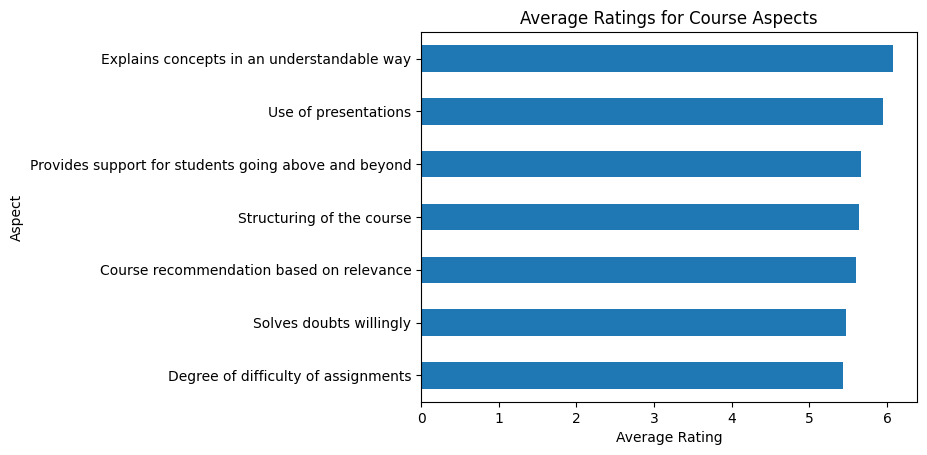

In [ ]:
import matplotlib.pyplot as plt

rating_columns = ratings_df.columns[2:]
mean_ratings = ratings_df[rating_columns].mean().sort_values(ascending=False)

print("Average Ratings by Aspect:")
print(mean_ratings)

# Plot the results
mean_ratings.plot(kind='barh')
plt.title('Average Ratings for Course Aspects')
plt.xlabel('Average Rating')
plt.ylabel('Aspect')
plt.gca().invert_yaxis()
plt.show()

STEP 5 - Sentiment analysis on 'Questions'

In [ ]:
!pip install textblob
from textblob import TextBlob

# Define sentiment function
def get_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to 'Questions'
comments_df['Sentiment'] = comments_df['Questions'].apply(get_sentiment)

# Show sample results
print(comments_df[['Questions', 'Sentiment']].head())

                                           Questions Sentiment
0  How much of the syllabus was covered in the cl...  Positive
1  How well did the teachers prepare for the clas...   Neutral
2    How well were the teachers able to communicate?  Positive
3  The teachers approach to teaching can best be...  Positive
4  Fairness of the internal evaluation process by...   Neutral


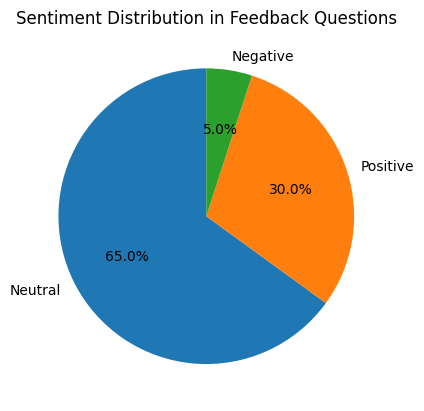

In [ ]:
# Visualize sentiment distribution
sentiment_counts = comments_df['Sentiment'].value_counts()

sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution in Feedback Questions')
plt.ylabel('')
plt.show()

STEP 6 - Generate a word cloud

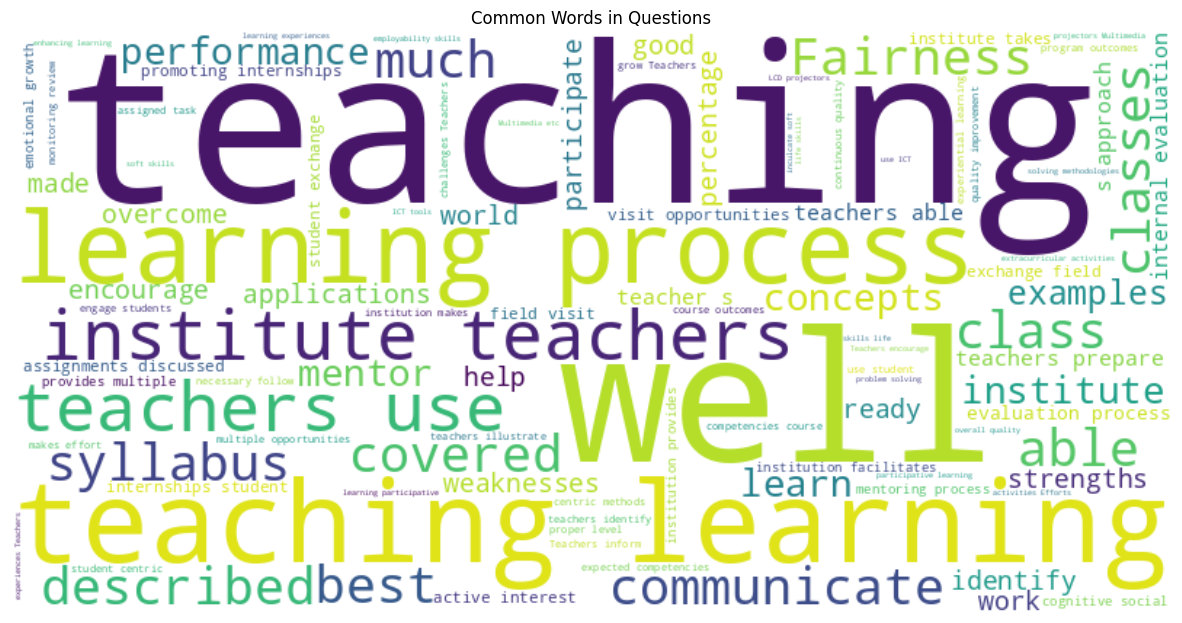

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# Combine text from 'Questions'
text = " ".join(question for question in comments_df['Questions'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Questions")
plt.show()